In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
X = np.array(['chat', 
              'chien',
              'chat', 
              'oiseau'])
y = np.array([['chat', 'poils'], 
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

In [3]:
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [4]:
transformer.transform(X)

array([0, 1, 0, 2], dtype=int32)

In [5]:
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int32)

In [6]:
#encodage ie données qualitatives ----> numériques
# 5 transformers d'encodage dans SKLEARN 
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit_transform(X)
# avec LabelEncoder chat<chien<oiseau avec LabelBinarizer on evite cela.


array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int32)

In [7]:
# Sparse Matrix ou matrice creuse ie beaucoup de 0.
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(X)


<4x3 sparse matrix of type '<class 'numpy.intc'>'
	with 4 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit_transform(y)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [9]:
#Normalisation des données quantitatives
#Xscaled = (X - Xmin)/(Xmax - Xmin) MinMaxScaler
                               # 0 <= Xscaled <= 1
from sklearn.preprocessing import MinMaxScaler    



In [10]:
X =np.array([[70],
             [80],
             [120]])

In [11]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [12]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

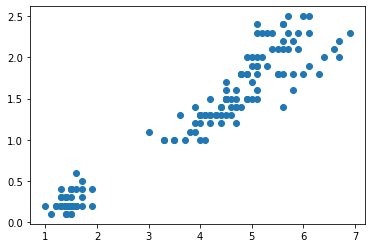

In [14]:
# charger les données
iris = load_iris()
X = iris.data

plt.scatter(X[:,2], X[ :,3])
plt.show()

No handles with labels found to put in legend.


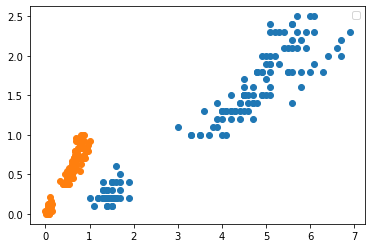

In [15]:
# charger les données
iris = load_iris()
X = iris.data

Xminmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:,2], X[ :,3])
plt.scatter(Xminmax[:,2], Xminmax[ :,3])
plt.legend()
plt.show()

In [16]:
#StandardScaler centre-reduite

from sklearn.preprocessing import StandardScaler

In [17]:
X =np.array([[70],
             [80],
             [120]])

In [18]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

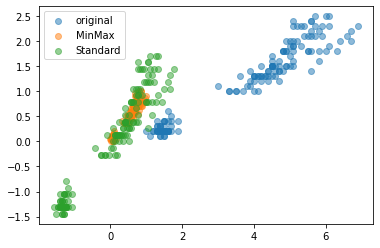

In [19]:
# charger les données
iris = load_iris()
X = iris.data

Xminmax = MinMaxScaler().fit_transform(X)
Xstd = StandardScaler().fit_transform(X)

plt.scatter(X[:,2], X[ :,3], alpha=0.5, label='original')
plt.scatter(Xminmax[:,2], Xminmax[ :,3], alpha=0.5, label='MinMax')
plt.scatter(Xstd[:,2], Xstd[ :,3], alpha=0.5, label='Standard')
plt.legend()
plt.show()

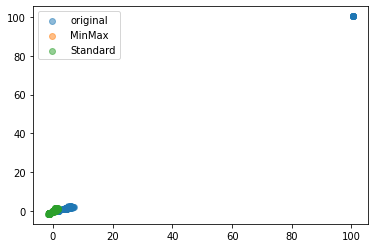

In [20]:
# MinMax et Standard sont sensibles aux outliers
# on rajoute quelques valeurs aberrantes

iris = load_iris()
X = iris.data

Xminmax = MinMaxScaler().fit_transform(X)
Xstd = StandardScaler().fit_transform(X)

outliers = np.full((10,4), 100)+np.random.randn()
X = np.vstack((X, outliers))

plt.scatter(X[:,2], X[ :,3], alpha=0.5, label='original')
plt.scatter(Xminmax[:,2], Xminmax[ :,3], alpha=0.5, label='MinMax')
plt.scatter(Xstd[:,2], Xstd[ :,3], alpha=0.5, label='Standard')
plt.legend()
plt.show()


In [21]:
from sklearn.preprocessing import RobustScaler

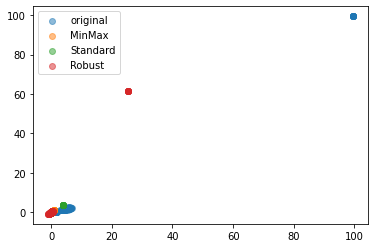

In [22]:
# robustScaler insensible aux outliers :
# Xrobust = (X - Median)/(3quartile - 1quartile)

iris = load_iris()
X = iris.data

outliers = np.full((10,4), 100)+np.random.randn()
X = np.vstack((X, outliers))

Xminmax = MinMaxScaler().fit_transform(X)
Xstd = StandardScaler().fit_transform(X)
Xrobust = RobustScaler().fit_transform(X)

plt.scatter(X[:,2], X[ :,3], alpha=0.5, label='original')
plt.scatter(Xminmax[:,2], Xminmax[ :,3], alpha=0.5, label='MinMax')
plt.scatter(Xstd[:,2], Xstd[ :,3], alpha=0.5, label='Standard')
plt.scatter(Xrobust[:,2], Xrobust[ :,3], alpha=0.5, label='Robust')
plt.legend()
plt.show()

In [23]:
# Polynomial feature

from sklearn.linear_model import LinearRegression

In [24]:
X = np.array([[1],
             [2],
             [0.5]])

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

In [27]:
from sklearn.linear_model import LinearRegression

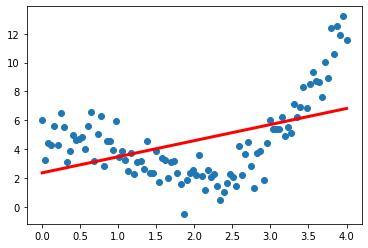

In [28]:
X = np.linspace(0, 4, 100).reshape(100,1)
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)

plt.scatter(X,y)

model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

plt.plot(X, y_pred, c='r', lw=3)

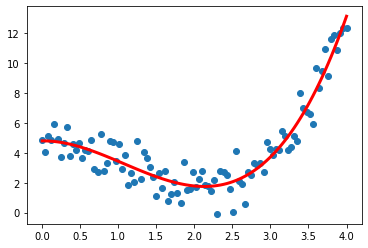

In [29]:
X = np.linspace(0, 4, 100).reshape(100,1)
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)

plt.scatter(X,y)

Xpoly = PolynomialFeatures(3).fit_transform(X)


model = LinearRegression().fit(Xpoly,y)
y_pred = model.predict(Xpoly)

plt.plot(X, y_pred, c='r', lw=3)

In [30]:
#le résultat est meilleur avec poly

In [31]:
from sklearn.preprocessing import PowerTransformer

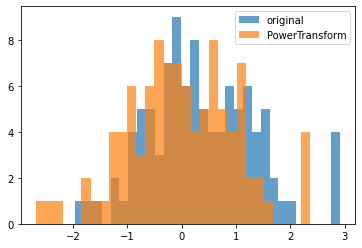

In [32]:
np.random.seed(0)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

X2 = PowerTransformer().fit_transform(X)

plt.hist(X[:,0],bins=30, alpha=0.7, label='original')
plt.hist(X2[:,0],bins=30, alpha=0.7, label='PowerTransform')
plt.legend()
plt.show()

In [33]:
#Discrétisation 

from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [34]:
X = np.linspace(0, 5, 10).reshape(10,1)
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [35]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))
# threshold=3 tout ce qui < 3 ==> 0 et >3 ==> 1

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [36]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()
# n_bins=6 decoupe en categ

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])